In [ ]:
import pandas as pd
import numpy as np
import re
import os

from google.colab import files

# Upload the file
uploaded = files.upload()

Saving combined_df.xlsx to combined_df.xlsx


In [ ]:
combined_df = pd.read_excel('combined_df.xlsx', sheet_name='Sheet1')

# Verify missing values for relevant columns
columns_to_check = [
    'Time Woken Up',  # Ensure exact column name
    'Healthiness Rating_meal',  # Healthiness Rating
    'Exercise Performed',  # Exercise performed during the morning routine
    'Traffic Condition',  # Traffic condition during the commute
    'Productivity Level'  # Productivity level for target variable
]

# Check for missing values in the relevant columns
missing_values = combined_df[columns_to_check].isnull().sum()
print("Missing values in relevant columns:")
print(missing_values)


Missing values in relevant columns:
Time Woken Up              0
Healthiness Rating_meal    0
Exercise Performed         0
Traffic Condition          0
Productivity Level         0
dtype: int64


In [ ]:
import pandas as pd


# --- Step 1: Handle 'Time Woken Up' properly ---
# Convert 'Time Woken Up' to datetime format for easier comparison
combined_df['Time Woken Up'] = pd.to_datetime(combined_df['Time Woken Up'], format='%H:%M:%S', errors='coerce')

# Define the reference time as 7:00 AM
seven_am = pd.to_datetime('07:00:00', format='%H:%M:%S')

# Create a new column for categorical time of day: 'Before 7:00 AM', 'At 7:00 AM', 'After 7:00 AM'
def categorize_time_of_day(time):
    if pd.isna(time):
        return 'Unknown'
    elif time < seven_am:
        return 'Before 7:00 AM'
    elif time == seven_am:
        return 'Exactly 7:00 AM'
    else:
        return 'After 7:00 AM'

combined_df['Time Woken Up'] = combined_df['Time Woken Up'].apply(categorize_time_of_day)

# --- Step 2: Standardize Exercise Performed to 'Yes'/'No' ---
combined_df['Exercise Performed'] = combined_df['Exercise Performed'].apply(lambda x: 'Yes' if x.lower() in ['yes', 'yoga', 'jogging'] else 'No')

print("Unique Values in 'Traffic Condition':")
print(combined_df['Traffic Condition'].unique())
print("-" * 40)

# --- Step 4: Ensure Healthiness Rating_meal has no missing values ---
# We'll check if there are any missing values in 'Healthiness Rating_morning' and handle them
combined_df['Healthiness Rating_meal'] = combined_df['Healthiness Rating_meal'].fillna('Unknown')

healthiness_mapping = {
    'healthy': 'Healthy',
    'moderately healthy': 'Moderately Healthy',
    'not healthy': 'Unhealthy',
    'moderate': 'Unhealthy',  # "Moderate" should be considered "Unhealthy"
    ' healthy ': 'Healthy',   # extra spaces around text
    ' healthy': 'Healthy',    # leading space
    'healthy ': 'Healthy',    # trailing space
    ' healthy': 'Healthy',    # leading space
    ' unhealthy': 'Unhealthy',  # leading space
    'moderately healthy ': 'Moderately Healthy',  # trailing space
    'moderately healthy': 'Moderately Healthy',
    'not healthy ': 'Unhealthy',  # trailing space
    'unhealthy': 'Unhealthy',  # unifying all lowercase versions
    ' not healthy': 'Unhealthy'  # leading space
}

# Apply the mapping by normalizing the text: lowercase and strip spaces
combined_df['Healthiness Rating_meal'] = (
    combined_df['Healthiness Rating_meal']
    .fillna('')  # Handle missing values
    .astype(str)  # Convert everything to string type
    .str.strip()  # Strip any leading/trailing whitespace
    .str.lower()  # Convert to lowercase
    .replace(healthiness_mapping)  # Map based on the dictionary
)

productivity_label_mapping = {
    'low': 'Low',
    'medium': 'Medium',
    'high': 'High'
}
combined_df['Productivity Level'] = (
    combined_df['Productivity Level'].str.lower()
    .replace(productivity_label_mapping)
)

# --- Step 5: Check unique values and count again ---
print("Unique Values in 'Healthiness Rating_meal':")
print(combined_df['Healthiness Rating_meal'].unique())
print("-" * 40)

print("Unique Values in 'Time Woken Up':")
print(combined_df['Time Woken Up'].unique())
print("-" * 40)

print("Unique Values in 'Exercise Performed':")
print(combined_df['Exercise Performed'].unique())
print("-" * 40)

print("Unique Values in Traffic Condition:")
print(combined_df['Traffic Condition'].unique())
print("-" * 40)

# --- Step 6: Print the distribution of features ---
print("Distribution of features and target:")
for feature in ['Time Woken Up', 'Exercise Performed', 'Traffic Condition', 'Healthiness Rating_meal']:
    print(f"Distribution of {feature}:")
    print(combined_df[feature].value_counts())
    print("-" * 40)

print("Distribution of target (Productivity Level):")
print(combined_df['Productivity Level'].value_counts())


Unique Values in 'Traffic Condition':
['Moderate' 'Heavy' 'Light']
----------------------------------------
Unique Values in 'Healthiness Rating_meal':
['Healthy' 'Moderately Healthy' 'Unhealthy']
----------------------------------------
Unique Values in 'Time Woken Up':
['After 7:00 AM' 'Before 7:00 AM' 'Exactly 7:00 AM']
----------------------------------------
Unique Values in 'Exercise Performed':
['Yes' 'No']
----------------------------------------
Unique Values in Traffic Condition:
['Moderate' 'Heavy' 'Light']
----------------------------------------
Distribution of features and target:
Distribution of Time Woken Up:
Time Woken Up
Before 7:00 AM     768
After 7:00 AM      311
Exactly 7:00 AM     32
Name: count, dtype: int64
----------------------------------------
Distribution of Exercise Performed:
Exercise Performed
No     660
Yes    451
Name: count, dtype: int64
----------------------------------------
Distribution of Traffic Condition:
Traffic Condition
Moderate    711
Ligh

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4350 - loss: 1.1062 - val_accuracy: 0.4305 - val_loss: 1.0812
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3159 - loss: 1.1107 - val_accuracy: 0.3722 - val_loss: 1.0844
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3735 - loss: 1.1021 - val_accuracy: 0.3229 - val_loss: 1.0979
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3673 - loss: 1.0861 - val_accuracy: 0.3363 - val_loss: 1.0906
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3695 - loss: 1.0991 - val_accuracy: 0.3229 - val_loss: 1.1002
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3278 - loss: 1.0898 - val_accuracy: 0.3229 - val_loss: 1.0946
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3996 - loss: 1.0823 - val_accuracy: 0.3632 - val_loss: 1.0939
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3994 - loss: 1.0781 - val_accuracy: 0.3587 - val_loss: 1.0

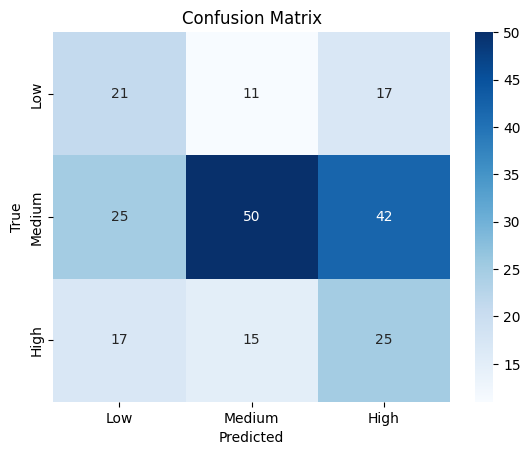

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = combined_df[['Time Woken Up', 'Exercise Performed', 'Traffic Condition', 'Healthiness Rating_meal']]
y = combined_df['Productivity Level']

# Mapping target labels to integers (if not already in integer format)
y = y.map({'Low': 0, 'Medium': 1, 'High': 2})

# One-hot encode the target labels (Productivity Level)
y_encoded = to_categorical(y, num_classes=3)

# Fix SettingWithCopyWarning by using .loc[] for modifying DataFrame columns
X.loc[:, 'Time Woken Up'] = X['Time Woken Up'].map({'Before 7:00 AM': 0, 'Exactly 7:00 AM': 1, 'After 7:00 AM': 2})
X.loc[:, 'Exercise Performed'] = X['Exercise Performed'].map({'No': 0, 'Yes': 1})
X.loc[:, 'Traffic Condition'] = X['Traffic Condition'].map({'Light': 0, 'Moderate': 1, 'Heavy': 2})
X.loc[:, 'Healthiness Rating_meal'] = X['Healthiness Rating_meal'].map({'Unhealthy': 0, 'Moderately Healthy': 1, 'Healthy': 2})

# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Compute class weights to handle class imbalance (where some classes appear much more frequently than others) so that the model to prioritize the majority classes.
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.array([0, 1, 2]), y=np.argmax(y_train, axis=1))  # Corrected class parameter
class_weight_dict = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}

# Define EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Build the neural network model
model = Sequential()

# Input Layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

# First Hidden Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Second Hidden Layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(3, activation='softmax'))  # 3 output classes for categorical classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increased epochs to allow for better learning
    batch_size=16,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')     # total correct posives in predicted posisitives
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')        # actual positives correctly identiified among actual positives
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')                # mean of precision and recall

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Save training dataset
X_train_df = pd.DataFrame(X_train, columns=['Time Woken Up', 'Exercise Performed', 'Traffic Condition', 'Healthiness Rating_meal'])
y_train_df = pd.DataFrame(y_train, columns=['Low', 'Medium', 'High'])

X_train_df.to_csv('X_train.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)

# Save validation dataset
X_test_df = pd.DataFrame(X_test, columns=['Time Woken Up', 'Exercise Performed', 'Traffic Condition', 'Healthiness Rating_meal'])
y_test_df = pd.DataFrame(y_test, columns=['Low', 'Medium', 'High'])

X_test_df.to_csv('X_test.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

print("Training and validation datasets saved as 'X_train.csv', 'y_train.csv', 'X_test.csv', and 'y_test.csv'")


Training and validation datasets saved as 'X_train.csv', 'y_train.csv', 'X_test.csv', and 'y_test.csv'


In [ ]:
from google.colab import files


# Download the datasets
files.download('X_train.csv')
files.download('y_train.csv')
files.download('X_test.csv')
files.download('y_test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>